<a href="https://colab.research.google.com/github/ollihansen90/Mathe-SH-ML/blob/main/Fehlerfunktionen_L%C3%B6sung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import matplotlib.pyplot as plt
import numpy as np
r = requests.get("https://raw.githubusercontent.com/ollihansen90/zeugs/main/ML_utils.py")
with open("utils.py", "w") as file:
    file.write(r.text)

from utils import LinearFunction, ableitung

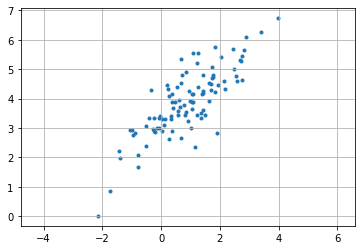

In [2]:
data = np.random.randn(100,2)@np.array([[1,0.5],[0.5,1]])+np.array([1,4])

plt.figure()
plt.scatter(data[:,0], data[:,1], marker=".")
plt.grid()
plt.axis("equal")
plt.show()


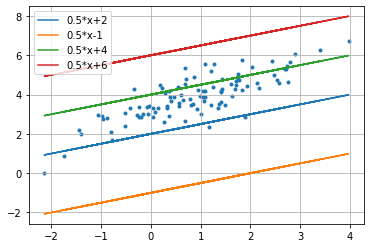

In [7]:
g1 = [LinearFunction(1/2, i) for i in [2,-1,4,6]]
plt.figure()
plt.scatter(data[:,0], data[:,1], marker=".")
for i in range(len(g1)):
    plt.plot(data[:,0], g1[i](data[:,0]))
plt.grid()
plt.legend([str(f) for f in g1])
plt.show()

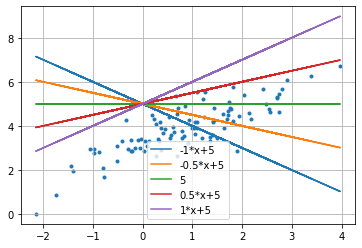

In [8]:
g2 = [LinearFunction(i, 5) for i in [-1,-1/2,0,1/2,1]]
plt.figure()
plt.scatter(data[:,0], data[:,1], marker=".")
for i in range(len(g2)):
    plt.plot(data[:,0], g2[i](data[:,0]))
plt.grid()
plt.legend([str(f) for f in g2])
plt.show()

In [30]:
#print(data)
def fehlerfunktion1(func, data): # MAE: Mean Absolute Error
    ausgaben = func(data[:,0])
    echtwerte = data[:,1]
    return np.mean(np.abs(echtwerte-ausgaben))
    
def fehlerfunktion(func, data): # MSE: Mean Squared Error
    ausgaben = func(data[:,0])
    echtwerte = data[:,1]
    return np.mean((echtwerte-ausgaben)**2)

for g in g1:
    print(g,fehlerfunktion(g,data))
print()
for g in g2:
    print(g,fehlerfunktion(g,data))

0.5*x+2 2.6611123050947314
0.5*x-1 20.413223604137965
0.5*x+4 0.8263714390659103
0.5*x+6 6.991630573037089

-1*x+5 4.757218202735666
-0.5*x+5 3.0987599414695137
5 2.4826875425747916
0.5*x+5 2.9090010060514992
1*x+5 4.377700331899637


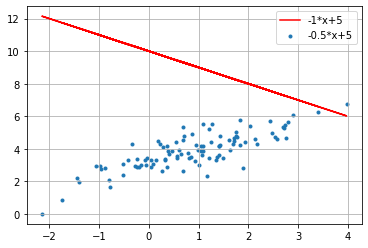

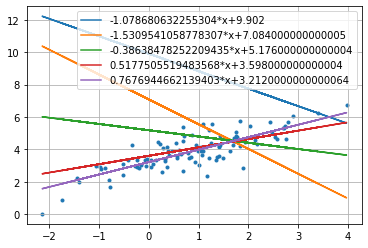

In [33]:
f = LinearFunction(-1, 10)

plt.figure()
plt.scatter(data[:,0], data[:,1], marker=".")
plt.plot(data[:,0], f(data[:,0]), "r")
plt.grid()
plt.legend([str(f) for f in g2])
plt.show()

x = data[:,0]
y = data[:,1]
funcliste = []
n_epochs = 200
lr = 0.1
for i in range(n_epochs):
    # x_neu = x_alt-lr*ableitung
    m_alt = f.m
    b_alt = f.b
    abl_m = np.mean(np.sign(f(x)-y)*x)
    abl_b = np.mean(np.sign(f(x)-y)*1)
    m_neu = m_alt-lr*abl_m
    b_neu = b_alt-lr*abl_b

    f.m = m_neu
    f.b = b_neu
    if i%40==0:
        funcliste.append(LinearFunction(m_neu, b_neu))

plt.figure()
plt.scatter(data[:,0], data[:,1], marker=".")
for gerade in funcliste:
    plt.plot(data[:,0], gerade(data[:,0]))
plt.grid()
plt.legend([str(gerade) for gerade in funcliste])
plt.show()